# Multiclass Logistic Regression using PyTorch

PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab. It is free and open-source software released under the Modified BSD license

## PyTorch Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see Bridge with NumPy). Tensors are also optimized for automatic differentiation (we’ll see more about that later in the Autograd section). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!

Go through the following link to learn the basics of Tensors in Pytorch:
https://pytorch.org/tutorials/beginner/basics/tensor_tutorial.html

## Linear Regression Using Pytorch

In [1]:
from numpy import loadtxt
import numpy as np
import torch
from torch import nn
from torchvision import transforms
import torch.optim as optim


# Load the datasets
np_data = loadtxt('ex1data1.txt', delimiter=',')

# convert np array to pytorch tensor
X = torch.from_numpy((np_data[:,np.newaxis,0]).astype('float32'))
Y = torch.from_numpy(np_data[:,np.newaxis,1].astype('float32'))

# Linear regression hypothesis using Pytorch
hypothesis = nn.Linear(X.shape[1], 1, bias=True) # h = w x + b

optimizer = optim.SGD(hypothesis.parameters(), lr = .01) # stochastic gradient descent with learning rate lr
Cost = nn.MSELoss() # mean squared error

J_history = []
for iterations in range(200):
    optimizer.zero_grad()
    # forward pass
    out = hypothesis(X)
    
    loss = Cost(out, Y)
    
    # backward pass
    loss.backward()
    
    # update paramters
    optimizer.step()
    
    J_history += [loss.item()]
    


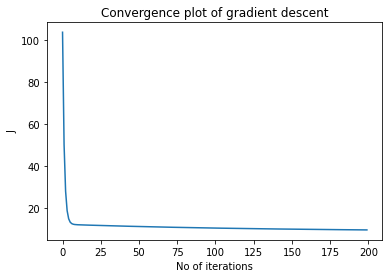

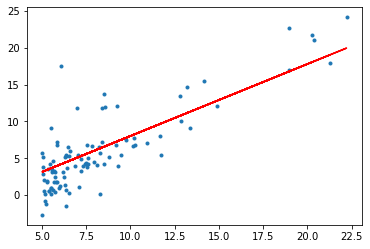

In [2]:
# plot the results
from matplotlib import pyplot as plt
plt.plot(J_history)
plt.title('Convergence plot of gradient descent')
plt.xlabel('No of iterations')
plt.ylabel('J')
plt.show()
plt.plot(X,Y,'.')
plt.plot(X[:, 0], out.detach().numpy(), c = 'r')

## Multiclass Logistic Regression using Pytorch (softmax classification)

Reading assignment: Go through the following

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html
https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html

Mini batch gradient descent:

https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a

In [3]:
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder

# Load the classification dataset (https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
np_data = datasets.load_iris()

# convert np array to pytorch tensor
X = torch.from_numpy((np_data.data).astype('float32'))
Y = torch.from_numpy((np_data.target.astype('int64')))


# Logistic regression hypothesis using Pytorch
hypothesis = nn.Sequential(
    nn.Linear(X.shape[1], 3, bias=True), 
    nn.LogSoftmax(dim=1)) 
    
optimizer = optim.SGD(hypothesis.parameters(), lr = .01) # stochastic gradient descent with learning rate lr
Cost = nn.NLLLoss() # Negative log likelihood loss

J_history = []
for iterations in range(200):
    optimizer.zero_grad()
    # forward pass
    out = hypothesis(X)
    
    loss = Cost(out, Y)
    
    # backward pass
    loss.backward()
    
    # update paramters
    optimizer.step()
    
    J_history += [loss.item()]
    


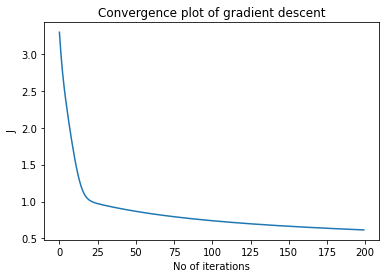

In [4]:
# plot the results
from matplotlib import pyplot as plt
plt.plot(J_history)
plt.title('Convergence plot of gradient descent')
plt.xlabel('No of iterations')
plt.ylabel('J')
plt.show()

# Lab Task
## Logistic Regression on MNIST Handwritten Digit 
Apply logistic regression to mnist handwritten digits. Use the code in the previous cell as the starter code. There are 10 classes so the number of out_feature in nn.Linear will be 10. Set the in_features according to the dimension of vectorised image. Plot the convergence plot of gradiet descent.

Note: Do not use convolution or Deep neural network. Use vectorised image as input. Use multiclass logistic regression model as studied in the class and implemented in the previous cell. 

### 1. Load the MNIST data
Follow the guidelines here to download and use MNIST data
https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [5]:
# use the following imports to download MNIST using Pytorch 
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from torchvision import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [6]:
mnist = fetch_openml('mnist_784', data_home=".")

X = mnist.data
X = X.reshape((-1, 28, 28))
X = X.astype('float32')

y = mnist.target
y = y.astype('float32')

In [7]:
# Splitting because data from openml is in combined form
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

In [9]:
X.shape
y.shape

(70000,)

In [10]:
dataset_train = TensorDataset(X_train, y_train)
dataset_test = TensorDataset(X_test, y_test)

In [11]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
traindataloader = DataLoader(dataset_train, batch_size=20, shuffle=True)
traindataIterator = iter(traindataloader)
testdataloader = DataLoader(dataset_test, batch_size=20, shuffle=False)
testdataIterator = iter(testdataloader)

dataLoaders = {'train' : traindataloader, 'test' : testdataloader}

In [12]:
image_sample, image_label = traindataIterator.next()
image_sample[0].shape

torch.Size([28, 28])

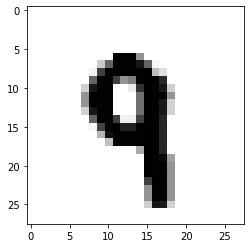

In [13]:
plt.imshow(image_sample[5].numpy().squeeze(), cmap='gray_r');

### 2.  Create a multiclass logistic regression (softmax) model and train

In [14]:
import torch.nn.functional as F

In [15]:
class MultiClassLogisticRegression(nn.Module):
    def __init__(self):
        super(MultiClassLogisticRegression, self).__init__()
        self.linear = nn.Linear(28*28, 10)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.linear(x)
        x = self.softmax(x)
        
        return x

In [54]:
model = MultiClassLogisticRegression()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = .003)
use_cuda = torch.cuda.is_available()

The details about training the model below are:

- Using **NLLLoss** such that the lower it is the better the model is performing.
- **Training** on the `train set` and then **validating** the results on the `test set`.
- **Saving** and maintaining the state of the model whenever validation loss is reduced compared to the previous minimum value.
- **Loading** the best saved state of training after all epochs have completed

In [55]:
def train_model(n_epochs, loader, model, optimizer, criterion, use_cuda, save_path):
    loss_minimum_valid = np.Inf
    J_history = []
    J_history_min = []
    
    for epoch in range(n_epochs):
        train_loss = 0
        valid_loss = 0
        
        # Training the model
        model.train()
        for batch_idx, (image, label) in enumerate(loader['train']):
            if use_cuda:
                image, label = image.cuda(), label.cuda()
            # preprocessing
            label = label.type(torch.LongTensor)
            image = image.view(image.shape[0], -1)
            optimizer.zero_grad()
            output = model(image)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        
        # Validating the model
        model.eval()
        for batch_idx, (image, level) in enumerate(loader['test']):
            if use_cuda:
                image, label = image.cuda(), label.cuda()
            # preprocessing
            label = label.type(torch.LongTensor)
            image = image.view(image.shape[0], -1)
            output = model(image)
            loss = criterion(output, label)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        J_history.append(valid_loss)
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        if valid_loss < loss_minimum_valid:
            print("Saving model. Validation loss has decreased to {:.6f}".format(valid_loss))
            torch.save(model.state_dict(), save_path)
            J_history_min.append(loss_minimum_valid)
            loss_minimum_valid = valid_loss
    return model, J_history, J_history_min

**Note: It takes time to traing the model so running the cell below again would take a while**

In [56]:
model, J_history, J_history_min = train_model(50, dataLoaders, model, optimizer, 
                      criterion, use_cuda, 'model.pt')

Epoch: 0 	Training Loss: -0.404151 	Validation Loss: -0.092920
Saving model. Validation loss has decreased to -0.092920
Epoch: 1 	Training Loss: -0.479648 	Validation Loss: -0.131023
Saving model. Validation loss has decreased to -0.131023
Epoch: 2 	Training Loss: -0.485699 	Validation Loss: -0.089150
Epoch: 3 	Training Loss: -0.488744 	Validation Loss: -0.116353
Epoch: 4 	Training Loss: -0.486240 	Validation Loss: -0.105524
Epoch: 5 	Training Loss: -0.492049 	Validation Loss: -0.110152
Epoch: 6 	Training Loss: -0.490656 	Validation Loss: -0.092772
Epoch: 7 	Training Loss: -0.492276 	Validation Loss: -0.088809
Epoch: 8 	Training Loss: -0.492290 	Validation Loss: -0.105101
Epoch: 9 	Training Loss: -0.492680 	Validation Loss: -0.130055
Epoch: 10 	Training Loss: -0.493498 	Validation Loss: -0.089320
Epoch: 11 	Training Loss: -0.495329 	Validation Loss: -0.091082
Epoch: 12 	Training Loss: -0.495332 	Validation Loss: -0.123309
Epoch: 13 	Training Loss: -0.495681 	Validation Loss: -0.109925


In [57]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

### 3. Plot Convergence plot of gradient descent with respect to no of epochs

Using `50` epochs as testing showed that further epochs do not show much improvement, plotting result for all epochs and the epochs specifically that resulted in reduction of loss.

#### Plot of reduction (convergence) of gradient descent

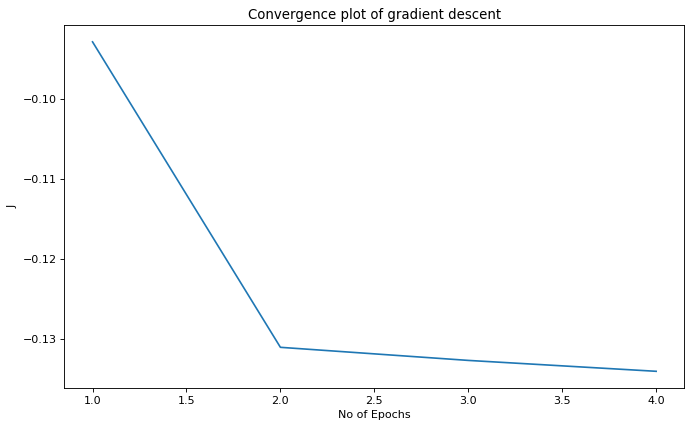

In [58]:
# plot the results
plt.figure(figsize=(10,6), dpi= 80)
x_axis = [int(x) for x in range(len(J_history_min))]
plt.plot(x_axis, J_history_min)
plt.title('Convergence plot of gradient descent')
plt.xlabel('No of Epochs')
plt.ylabel('J')
plt.show()

#### Plot of overall progression throughout all the epochs

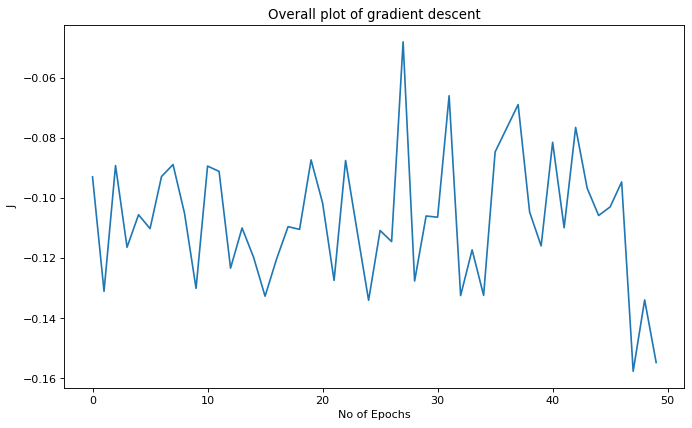

In [59]:
# plot the results
plt.figure(figsize=(10,6), dpi= 80)
x_axis = [int(x) for x in range(len(J_history))]
plt.plot(x_axis, J_history)
plt.title('Overall plot of gradient descent')
plt.xlabel('No of Epochs')
plt.ylabel('J')
plt.show()

### 4. Test on a batch of test images and display images with the predicted label

In [60]:
def test_model(loader, model, criterion, use_cuda):
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (image, label) in enumerate(loader['test']):
        if use_cuda:
            image, label = image.cuda(), label.cuda()
        label = label.type(torch.LongTensor)
        image = image.view(image.shape[0], -1)
        output = model(image)
        loss = criterion(output, label)
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        pred = output.data.max(1, keepdim=True)[1]
        correct += np.sum(np.squeeze(pred.eq(label.data.view_as(pred))).cpu().numpy())
        total += image.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [61]:
test_model(dataLoaders, model, criterion, use_cuda)

Test Loss: -0.498982


Test Accuracy: 49% (6984/14000)


#### Observation

The model has trained on only `50` epochs and still classifying 16% of the images correctly. More training, or using better models like deep neural networks or convolutional neural networks would result in a signficantly higher accuracy.


### Testing on a batch and displaying predicted images

In [62]:
import ipyplot

In [63]:
test_image, test_label = next(testdataIterator)

In [64]:
test_output = model(test_image.view(test_image.shape[0], -1))

In [65]:
predictions = test_output.data.max(1, keepdim=True)[1]

Images along with their predicted labels


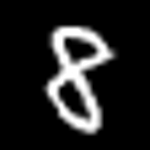
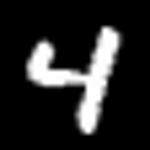
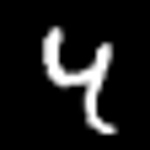
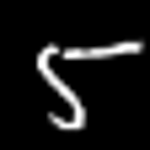
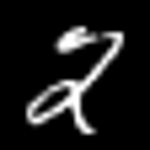
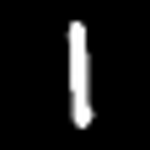
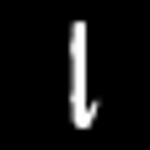
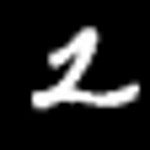
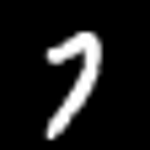
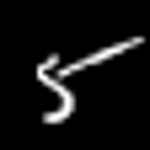
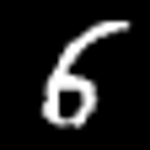
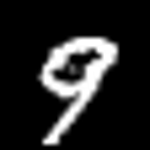
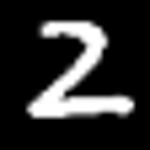
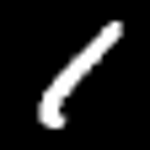
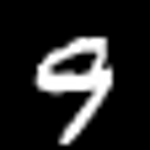
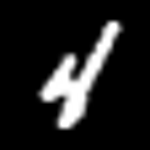
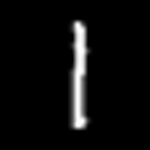
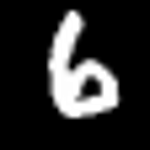
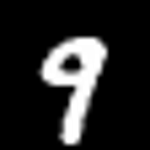
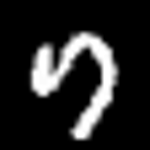


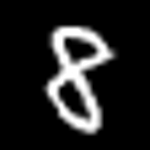
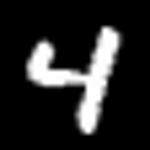
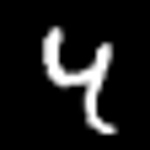
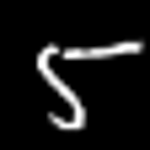
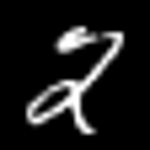
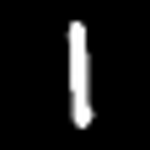
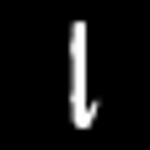
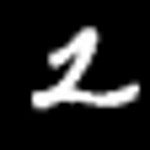
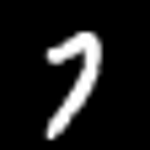
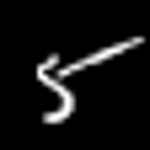
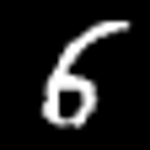
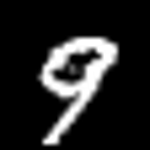
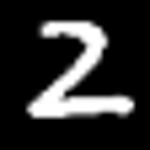
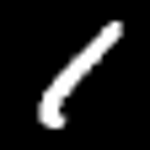
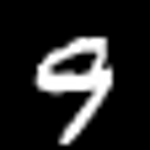
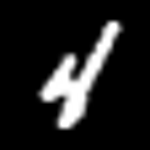
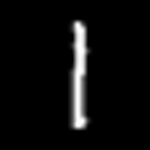
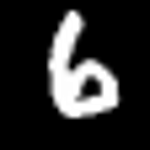
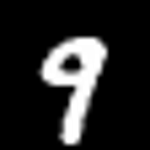
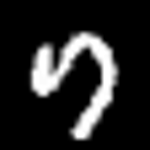

In [66]:
ipyplot.plot_images(test_image, predictions)